Problem 1-4 \
Assignment 1 \
\
group members:
1) Shuhan Xiao (Uni-id: kg410 Matrikelnr.: 3160697), 
2) Klaus Kades (Uni-id: fw448 Matrikelnr.: 3408463), 
3) Lucas-Raphael Müller (Uni-id: al413 Matrikelnr.: 3205638), 
4) Melanie Schellenberg (Uni-id: qh400 Matrikelnr.: 3146390)

In [1]:
# Install a pip package in the current Jupyter kernel
! pip install numpy pandas python-igraph matplotlib pycairo cairocffi

In [2]:
import pandas as pd
import networkx as nx
import numpy as np

path = '/workplace/CNA/Complex-Network-Analysis-Exercises/assignment-1/FAOSTAT_data_10-26-2021.csv'
data = pd.read_csv(path)
others_values=data[data['Partner Countries']== 'Others (adjustment)']
FAO_values = data[data['Partner Countries']== 'Total FAO']
Unspecified = data[data['Partner Countries']== 'Unspecified Area']
data = data.drop(others_values.index, axis=0)
data = data.drop(FAO_values.index, axis=0)
data = data.drop(Unspecified.index, axis=0)
df = data.fillna('NULL')
NULL_values = df[df['Flag']!= 'NULL']
df = df.drop(NULL_values.index, axis=0)
df=df.reset_index()

print(df.columns)
print(df.head())

#compare these features with the ones of the exersice session 
print(df.shape)
print(df[df['Reporter Countries']=='United States of America'].Value.sum())
print(df[df['Partner Countries']=='United States of America'].Value.sum())
df_1 = df[['Reporter Countries', 'Partner Countries', 'Value']]



Index(['index', 'Domain Code', 'Domain', 'Reporter Country Code (FAO)',
       'Reporter Countries', 'Partner Country Code (FAO)', 'Partner Countries',
       'Element Code', 'Element', 'Item Code', 'Item', 'Year Code', 'Year',
       'Unit', 'Value', 'Flag', 'Flag Description'],
      dtype='object')
   index Domain Code                Domain  Reporter Country Code (FAO)  \
0      0          FT  Forestry Trade Flows                            2   
1      3          FT  Forestry Trade Flows                            2   
2      4          FT  Forestry Trade Flows                            3   
3      5          FT  Forestry Trade Flows                            3   
4      6          FT  Forestry Trade Flows                            3   

  Reporter Countries  Partner Country Code (FAO) Partner Countries  \
0        Afghanistan                          68            France   
1        Afghanistan                         165          Pakistan   
2            Albania                

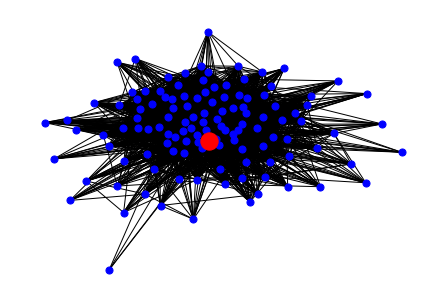

Nodes: 122
Links: 3380
Lmin = the same as kmin: 1
Lmax = the same as kmax: 165
kmin: 1
kmax: 165


In [46]:
#task1
import matplotlib.pyplot as plt
def task_undirected_graph(df):    

    g = nx.from_pandas_edgelist(df, "Reporter Countries", "Partner Countries", 'Value')
   
    edge_labels = dict([((n1, n2), str(g.get_edge_data(n1, n2)['Value']))
                    for n1, n2 in g.edges])
    pos =nx.spring_layout(g, seed=1)
    # nx.draw_networkx(g, node_size=100, node_color = 'lightblue', pos=pos)
    # nx.draw_networkx_edge_labels(g, pos=pos, edge_labels = edge_labels, font_size=6)
    #
    #  Create ego graph of main hub
    hub_ego = nx.ego_graph(g, 'France', radius=1)

    # # Draw graph
    pos = nx.spring_layout(hub_ego, seed=1)  # Seed layout for reproducibility
    nx.draw(hub_ego, pos, node_color="b", node_size=50, with_labels=False)

    # Draw ego as large and red
    options = {"node_size": 300, "node_color": "r"}
    nx.draw_networkx_nodes(hub_ego, pos, nodelist=['France'], **options)
    plt.show()
    degrees = [ degree for name, degree in  g.degree()] 
    nodes= len(hub_ego.nodes)

    print(f'Nodes: {len(hub_ego.nodes)}')
    print(f'Links: {len(hub_ego.edges)}')
    print(f'Lmin = the same as kmin: {min(degrees)}')
    print(f'Lmax = the same as kmax: {max(degrees)}')
    print(f'kmin: {min(degrees)}')
    print(f'kmax: {max(degrees)}')

    return nodes, degrees, hub_ego
        

nodes, degrees, g = task_undirected_graph(df[:])

In [38]:
#task2
import numpy as np

expected_k = np.sum(degrees)/nodes
print(f'expected_k: {expected_k}')
p = expected_k/(nodes-1)
print(f'p: {p}')
expected_L = p*nodes*(nodes-1)/2
print(f'expected_L: {expected_L}')
expected_k = 2* expected_L/nodes
print(f'expected_k: {expected_k}')
p = 2 *expected_L/(nodes*(nodes-1))
print(f'p: {p}')



expected_k: 67.24590163934427
p: 0.5557512532177212
expected_L: 4102.0
expected_k: 67.24590163934427
p: 0.5557512532177212


Text(0.5, 1.0, 'random')

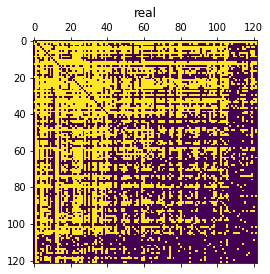

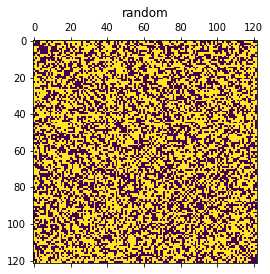

In [42]:

a = nx.to_numpy_array(g)
plt.matshow(a)
plt.title('real')

g_random = nx.erdos_renyi_graph(nodes, p, seed=1, directed=False)
a_random = nx.to_numpy_array(g_random)
plt.matshow(a_random)
plt.title('random')

Visual differences: 
While the adjacency matrix of the real network is non-zero in a patch-like structure, the adjacency matrix of the random network is generally non-zero randomly. Both matrices show are zero entries along the diagonal and are symmetric (accoriding to the diagonal). 

Interpretation: 
In the random network, nodes are randomly connected following the probability p. As the adjacency matrix is 1 where nodes i,j are connected and 0 where nodes are not-connected, the visualisation also looks randomly. The diagonal entries are zero, because no node is connected to itself.  

In the real network however, all nodes unequal to "France" are connected to the ndoe "France". Therefore the matrix is 1 in A[1,:] and A[:,1], since node France is node #1. The diagonal entries are zero, because no node is connected to itself. Furthermore, the adjacency matrix is most often equal to 1 in the upper left corner and more often 0 in the bottom right corner. This means that the neigbour nodes of "France" are not connected with equal probability (compared a random network). 

This leads to a degree distribution that is not similar to the random network. There will be more lower degrees and more higher degrees (a pleateau). 
Additionally, the clustering coefficent is hence dependent on the node and not equal for all nodes (as for the random network).


<Figure size 864x576 with 0 Axes>

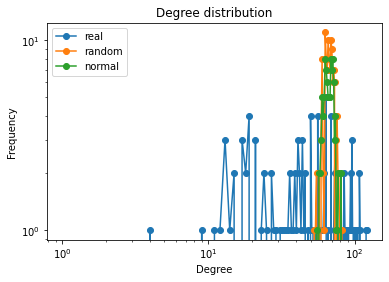

In [45]:
#task4
plt.figure(figsize=(12, 8)) 
def degree_distr(degree_freq1, degree_freq2, degree_freq3, labels):
    for id,i in enumerate([degree_freq1,degree_freq2, degree_freq3]):
        degrees = range(len(i)) 
        plt.loglog(degrees, i,'o-', label=labels[id]) 
    plt.xlabel('Degree') 
    plt.ylabel('Frequency')
    plt.legend()
    plt.title('Degree distribution')
plt.show()



degrees_random = [ degree for name, degree in  g_random.degree()] 
mean = np.mean(degrees_random)
std = np.std(degrees_random)

normal =np.random.normal(loc=mean, scale=std, size=100)
degrees_normal, bin_edges = np.histogram(normal, range=(0,100), bins=100)


degree_distr(nx.degree_histogram(g), nx.degree_histogram(g_random), degrees_normal, labels=['real', 'random', 'normal'])


Visual differences: 
Compared to the degree distribution of the random network, the degree distribution of the real network is broader. This means there is a higher amount of lower and higher degrees. The degree distribution of the random network matches well a normal distribution (green and organge very similar). In contrast, the distribution of the real network visually dos not seem to follow a normal distribution. 

Interpretation: 
The degree distribution of a random network can be described by a poisson distribution which can be approximated by a normal distribution for approximately >30 nodes. Therefore, it is reasonable that the distribution of the random network closely resembles the normal distribution. As already mentioned in task 3, the degrees of different nodes in the real network highly differ. Therefore, the degree distribution is "broader" and can not be easily mathematically described.

Answer:
The Erdös-Renyì ensemble realization of G(n;p) does NOT provide a good approximation of the real network G_France.